In [98]:
#Importing Packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math as m
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
import pickle,joblib
import numpy as np

In [4]:
def read_data(path):
    import pandas as pd
    return pd.read_csv(path)

In [5]:
data = read_data(
"https://raw.githubusercontent.com/harankumar16/Machine-Learning-Models/main/Logistic%20Regresssion/bank-full%20-%201.csv")

In [6]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [19]:
columns = data.columns
columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [10]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [14]:
data.duplicated().sum() ## No duplicated values and no null values

0

In [23]:
for i in range(0,len(columns)):
    print("The unique values and their count in column",columns[i])
    print(data.iloc[::,i].value_counts())
    print("="*50)

The unique values and their count in column age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64
The unique values and their count in column job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
The unique values and their count in column marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
The unique values and their count in column education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
The unique values and their count in column default
no     44396
yes      815
Name: default, dtype: int64
The unique values and their count in column balance
 0     

In [22]:
data.iloc[::,0].value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

## Exploratory data analysis

<Axes: >

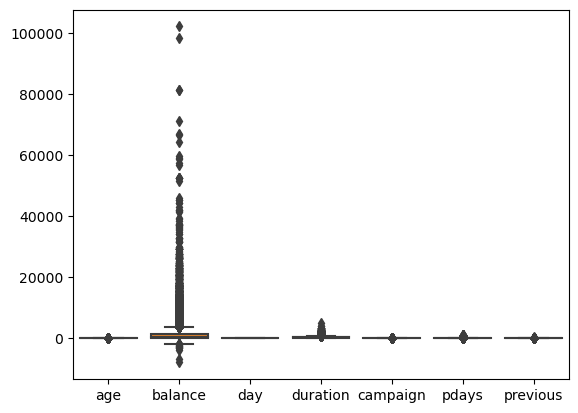

In [24]:
sns.boxplot(data)

In [25]:
def treat_outliers(data):
    q3 = np.percentile(data,75)
    q1 = np.percentile(data,25)
    iqr = q3 - q1
    upper = q3 + (1.5 * iqr)
    lower = q1 - (1.5 * iqr)
    for i in range(0,len(data)):
        if data[i] > upper:
            data[i] = upper
        elif data[i] < lower:
            data[i] = lower
    return data
    

In [32]:
joblib.dump(treat_outliers,"treat_outliers.pkl")

['treat_outliers.pkl']

In [33]:
treat_outliers_pkl = joblib.load('treat_outliers.pkl')

In [44]:
columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

<Axes: >

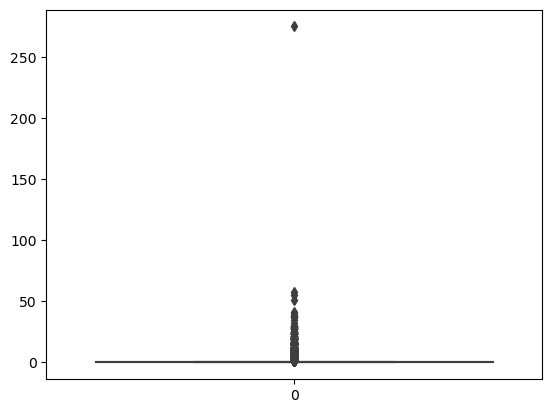

In [56]:
ind_out = 14
sns.boxplot(data.iloc[::,ind_out])

In [57]:
data.iloc[::,ind_out] = treat_outliers_pkl(data.iloc[::,ind_out])

C:\Users\HARANKUMAR\AppData\Local\Temp\ipykernel_4832\4108209344.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = upper


<Axes: >

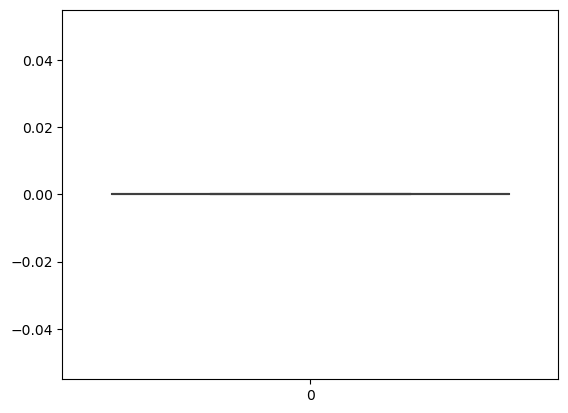

In [58]:
sns.boxplot(data.iloc[::,ind_out])

In [59]:
for i in range(0,len(columns)):
    print("The unique values and their count in column",columns[i])
    print(data.iloc[::,i].value_counts())
    print("="*50)

The unique values and their count in column age
32.0    2085
31.0    1996
33.0    1972
34.0    1930
35.0    1894
36.0    1806
30.0    1757
37.0    1696
39.0    1487
38.0    1466
40.0    1355
41.0    1291
42.0    1242
45.0    1216
29.0    1185
46.0    1175
43.0    1161
44.0    1136
47.0    1088
28.0    1038
48.0     997
49.0     994
50.0     939
51.0     936
52.0     911
27.0     909
53.0     891
57.0     828
54.0     811
55.0     806
26.0     805
56.0     778
59.0     770
58.0     740
60.0     596
25.0     527
70.5     487
24.0     302
23.0     202
61.0     147
22.0     129
62.0      80
21.0      79
63.0      77
64.0      74
70.0      67
66.0      63
65.0      59
67.0      54
20.0      50
69.0      44
68.0      36
19.0      35
18.0      12
Name: age, dtype: int64
The unique values and their count in column job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
un

## Modeling

In [60]:
def train_test(x,y,test_size):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size,random_state=1234)
    for i in x_train,x_test,y_train,y_test:
        print(i.shape)
    return x_train,x_test,y_train,y_test
print("Train and test data is being splitted...")

Train and test data is being splitted...


In [61]:
joblib.dump(train_test,"train_test_split.pkl")

['train_test_split.pkl']

In [88]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
d = defaultdict(LabelEncoder)
# Encoding the variable
data = data.apply(lambda lb: d[lb.name].fit_transform(lb))

# Inverse the encoded
#fit = fit.apply(lambda lb: d[lb.name].inverse_transform(lb))
# Using the dictionary to label future data
#fit = fit.apply(lambda lb: d[lb.name].inverse_transform(lb))
#fit
data


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,4,1,2,0,3020,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,929,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,902,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2404,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,901,0,0,2,4,8,198,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,9,1,2,0,1725,0,0,0,16,9,643,2,0,0,3,1
45207,53,5,0,0,0,2623,0,0,0,16,9,456,1,0,0,3,1
45208,53,5,1,1,0,4162,0,0,0,16,9,643,4,0,0,2,1
45209,39,1,1,1,0,1568,0,0,1,16,9,508,3,0,0,3,0


In [89]:
x=data.iloc[::,0:15]
y = data.iloc[::,16]

In [103]:
train_test_pkl = joblib.load('train_test_split.pkl')
x_train,x_test,y_train,y_test=train_test_pkl(x,y,0.3)


(31647, 15)
(13564, 15)
(31647,)
(13564,)


In [91]:
def logistic_reg_model(x_train,y_train,x_test):
    model = LogisticRegression()
    model_train = model.fit(x_train,y_train)
    print("Model training is completed")
    pred = model_train.predict(x_test)
    return pred

In [72]:
#joblib.dump(logistic_reg_model,"Logistic_Regression_model.pkl")

['Logistic_Regression_model.pkl']

In [93]:
log_reg_model = joblib.load("Logistic_Regression_model.pkl")

In [104]:
pred = log_reg_model(x_train,y_train,x_test)

Model training is completed


C:\Users\HARANKUMAR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [105]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [106]:
accuracy_score(y_test,pred)

0.8832202890002949

In [99]:
con=confusion_matrix(y_test,pred)
con

array([[7792,  204],
       [ 871,  176]], dtype=int64)